<a href="https://colab.research.google.com/github/pko89403/DeepLearningSelfStudy/blob/master/RNN_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget https://raw.githubusercontent.com/deeplearningzerotoall/PyTorch/master/data-02-stock_daily.csv

--2020-03-22 06:52:49--  https://raw.githubusercontent.com/deeplearningzerotoall/PyTorch/master/data-02-stock_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36304 (35K) [text/plain]
Saving to: ‘data-02-stock_daily.csv’

data-02-stock_daily 100%[===================>]  35.45K  --.-KB/s    in 0.01s   

2020-03-22 06:52:49 (2.86 MB/s) - ‘data-02-stock_daily.csv’ saved [36304/36304]



In [26]:
import torch 
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)

In [0]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [0]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=',')
xy = xy[::-1]

In [0]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [15]:
print(train_set)

[[5.68002570e+02 5.68002570e+02 5.52922516e+02 1.31000000e+04
  5.58462551e+02]
 [5.61202549e+02 5.66432590e+02 5.58672539e+02 4.12000000e+04
  5.59992565e+02]
 [5.66892592e+02 5.67002574e+02 5.56932537e+02 1.08000000e+04
  5.56972503e+02]
 ...
 [7.38000000e+02 7.42799988e+02 7.35369995e+02 1.13230000e+06
  7.37799988e+02]
 [7.35770020e+02 7.46239990e+02 7.35559998e+02 1.05370000e+06
  7.45690002e+02]
 [7.45369995e+02 7.47000000e+02 7.36280029e+02 1.45320000e+06
  7.40280029e+02]]


In [0]:
def minmax_scaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

def build_dataset(time_series, seq_length):
  data_x = []
  data_y = []
  for i in range(0, len(time_series) - seq_length):
    _x = time_series[i:i + seq_length, :]
    _y = time_series[i + seq_length, [-1]]
    print(_x, '->', _y)
    data_x.append(_x)
    data_y.append(_y)
  return np.array(data_x), np.array(data_y)

In [21]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]] -> [0.14877845]
[[0.13075878 0.14979734 0.13950916 0.35107104 0.13395688]
 [0.15042455 0.16374823 0.15035616 0.23008871 0.14071631]
 [0.1454909  0.1445232  0.11061925 0.34481488 0.15451699]
 [0.16681256 0.20764194 0.1877305  0.43786856 0.2252799 ]
 [0.18685757 0.18212234 0.15604838 0.60962618 0.15331985]
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]
 [0.11726889 0.14037215 0.14301739 0.21129334 0.14877845]] -> [0.12107172]
[[0.15042455 0.16374823 0.15035616 0.23008871 0.14071631]
 [0.1454909  0.1445232  0.11061925 0.34481488 0.15451699]
 [0.16681256 0.20764194 0.1877305  0.43786856 0.2252799 ]
 [0.18685757 0.18212234 0.15604838 0.60962618 0.15331985]
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]
 [0.11726889 0.14037215 0.14301739 0.21129334 0.14877845]
 [0.13503701 0.12893922 0.13850677 0.1832392  0.12107172]] -> [0.11480507]
[[0.1454909  0.1445232  0.11061925 0.344814

In [0]:
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x 

In [0]:
net = Net(data_dim, hidden_dim, output_dim, 1)
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [24]:
for i in range(iterations):
  optimizer.zero_grad()
  outputs = net(trainX_tensor)
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(i, loss.item())

0 0.22710378468036652
1 0.18340930342674255
2 0.15106432139873505
3 0.1261231005191803
4 0.1059873104095459
5 0.08915015310049057
6 0.07493706047534943
7 0.06327900290489197
8 0.054496027529239655
9 0.04902385175228119
10 0.04693441838026047
11 0.04731706157326698
12 0.04838261753320694
13 0.04839475825428963
14 0.04633764922618866
15 0.04207770526409149
16 0.03620169311761856
17 0.029662003740668297
18 0.023386552929878235
19 0.01801123656332493
20 0.01380065642297268
21 0.010714649222791195
22 0.008532213978469372
23 0.006976503878831863
24 0.005824478343129158
25 0.00498742051422596
26 0.004524711985141039
27 0.004554683808237314
28 0.005089901387691498
29 0.005920969415456057
30 0.0066848937422037125
31 0.007072674110531807
32 0.0069739907048642635
33 0.006471902132034302
34 0.005753517150878906
35 0.005014688707888126
36 0.004395288415253162
37 0.003953743260353804
38 0.003676637075841427
39 0.0035109829623252153
40 0.003401306224986911
41 0.0033151069656014442
42 0.00324889342300

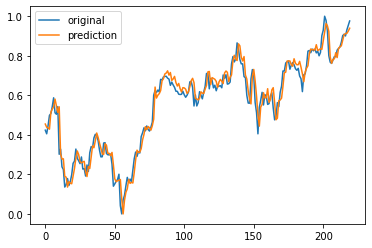

In [28]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()